# Lectura de datos

In [53]:
#Llamar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats

In [5]:
#Lectura de datos
play_store = pd.read_csv("googleplaystore.csv")

In [6]:
play_store.shape

(10841, 13)

# Entendimiento de los datos

In [7]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Limpieza de datos

## Cambiar el tipo de las variables

In [10]:
#Cambiar la variable Reviews a string
play_store["Reviews"] = play_store["Reviews"].astype(str)
#Sustituir la K y M por números
play_store["Reviews"] = ( play_store["Reviews"]  .str.replace("k", "e3", regex=False) .str.replace("M", "e6", regex=False))
#Convertir la variable Reviews a integro
play_store["Reviews"] =  (pd.to_numeric(play_store["Reviews"], errors="coerce").astype("Int64"))

In [11]:
#Agegar una columna donde la variable Size sea númerica
##Cambiar la variable Size a string
play_store["Size_num"] = play_store["Size"].astype(str)
#Sustituir la K y M por números, y la frase varies with device por nulls
play_store["Size_num"] = ( play_store["Size_num"]  .str.replace("k", "e3", regex=False) .str.replace("M", "e6", regex=False)) .str.replace("Varies with device", "", regex=False) .str.replace("+", "", regex=False)
#Convertir la variable Size a integro
play_store["Size_num"] =  (pd.to_numeric(play_store["Size_num"], errors="coerce").astype("Int64"))


In [12]:
#Cambiar la variable Price a flotante
play_store["Price"] = play_store["Price"].astype(str)
play_store["Price"] = play_store["Price"].replace("Everyone", "0", regex=False)
play_store["Price"] = play_store["Price"].str.replace(r"[^0-9.]", "", regex=True)
play_store["Price"] = pd.to_numeric(play_store["Price"], errors="coerce")
play_store.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [13]:
#Cambiar la variable installs a entero
play_store['Installs'] = pd.to_numeric(play_store['Installs'].str.replace(r'[+,]', '', regex=True), errors='coerce')




In [14]:
#Volver a revisar el tipo las variables
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews             Int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_num            Int64
dtype: object

In [15]:
#Revisar las medidas de las variables numéricas
play_store.describe()

,Rating,Reviews,Installs,Price,Size_num
count,9367.000000,10841.0,1.084000e+04,10841.000000,9145.0
mean,4.193338,444388.653537,1.546434e+07,1.027273,21516529.52433
std,0.537431,2927728.464012,8.502936e+07,15.948971,22588747.934144
min,1.000000,0.0,0.000000e+00,0.000000,8500.0
25%,4.000000,38.0,1.000000e+03,0.000000,4900000.0
50%,4.300000,2094.0,1.000000e+05,0.000000,13000000.0
75%,4.500000,54798.0,5.000000e+06,0.000000,30000000.0
max,19.000000,78158306.0,1.000000e+09,400.000000,100000000.0


In [16]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000


## Tratamiento de datos nulos

In [17]:
#Determinar cuántos datos nulos hay en nuestro dataset
row_nan_count = play_store.isna().sum(axis=0)
print(row_nan_count)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Size_num          1696
dtype: int64


In [18]:
#Determinar el % de nulos de cada variable
print(play_store.isna().mean()*100)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.009224
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
Size_num          15.644313
dtype: float64


In [19]:
#Crear una copia
play_store_clean = play_store.copy()

In [20]:
#Los valores con null en la variable Size_num es porque cuando la variable era objeto se tenía la descripción Varies with device
#Por lo que, decidimos aplicar la moda
play_store_clean ["Size_num"] = play_store_clean["Size_num"].fillna(play_store_clean["Size_num"].mode()[0])

In [21]:
#Eliminar las filas con los valores nulos en las variables Rating, Type, Content Rating
play_store_clean = play_store_clean.dropna(subset=['Rating', 'Type', 'Content Rating', "Current Ver"])

In [22]:
#Se decide eliminar la variable Android Ver
play_store_clean = play_store_clean.drop(columns="Android Ver")

In [23]:
#Comprobamos que ya no hay nulos
print (play_store_clean.isna().sum(axis=0))

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Size_num          0
dtype: int64


In [24]:
play_store_clean.describe()

,Rating,Reviews,Installs,Price,Size_num
count,9362.000000,9362.0,9.362000e+03,9362.000000,9362.0
mean,4.191893,514266.863918,1.790492e+07,0.961233,20873844.531083
std,0.515222,3144696.245554,9.125699e+07,15.819954,21779127.938961
min,1.000000,1.0,1.000000e+00,0.000000,8500.0
25%,4.000000,187.0,1.000000e+04,0.000000,6600000.0
50%,4.300000,5941.5,5.000000e+05,0.000000,11000000.0
75%,4.500000,81596.25,5.000000e+06,0.000000,27000000.0
max,5.000000,78158306.0,1.000000e+09,400.000000,100000000.0


In [25]:
play_store_clean.dtypes

App                object
Category           object
Rating            float64
Reviews             Int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Size_num            Int64
dtype: object

In [26]:
play_store_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Size_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,19000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,14000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,8700000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,25000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,2800000


In [27]:
play_store_clean.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [28]:
play_store_clean.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [29]:
play_store_clean.Installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [30]:
play_store_clean.Type.unique()

array(['Free', 'Paid'], dtype=object)

# Crear variables

In [31]:
#Crear una variable para con rangos de la variable Installs
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, float('inf')]
labels = ['0-100', '101-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-100M', '100M+']
play_store_clean['Installs_Category'] = pd.cut(play_store_clean['Installs'], bins=bins, labels=labels, right=False)
play_store_clean[['Installs', 'Installs_Category']].head(10)




,Installs,Installs_Category
0,10000.0,10K-100K
1,500000.0,100K-1M
2,5000000.0,1M-10M
3,50000000.0,10M-100M
4,100000.0,100K-1M
5,50000.0,10K-100K
6,50000.0,10K-100K
7,1000000.0,1M-10M
8,1000000.0,1M-10M
9,10000.0,10K-100K


# Analisis Univariante 

## Estas son las variables numéricas incluidas en el dataset.


In [32]:
new_csv = play_store_clean.to_csv("cleandata.csv")

In [33]:
#Installs Numerica Discreta
#Precio Numerica Continua fue descartada del Eda por tener mayoria apps gratis
#Tamaño Numerica Continua fue descartada del EDA por no ser suficinetemente relevante
#Rating Numerica Continua
#Reviews Numerica Discreta

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.linear_model import LinearRegression

## EDA univariante de variables discretas

### La variable Installs, de las variables discretas, es la que tiene mayor importancia para el estudio, por lo que se decidió usarla más a profundidad como variable numérica discreta.

In [35]:
#Calculo de frecuencias
#Frecuencia absoluta de la variable Installs
frecuencia_absoluta = play_store_clean['Installs'].value_counts().sort_index()
#Frecuencia absoluta acumulada de la variable Installs
frecuencia_absoluta_acum = frecuencia_absoluta.cumsum()
#Frecuencia relativa en porcentaje de la variable Installs
frecuencia_relativa = play_store_clean['Installs'].value_counts(normalize=True).sort_index() * 100
#normalize=True devuelve la proporción de cada valor en relación al total, en lugar de las frecuencias absolutas.
#Frecuencia relativa acumulada de la variable Installs
frecuencia_relativa_acum=frecuencia_relativa.cumsum()

In [36]:
tabla_frecuencias = pd.DataFrame({ 'Frecuencia Absoluta':
frecuencia_absoluta,
'Frecuencia Absoluta Acumulada':
frecuencia_absoluta_acum,
'Frecuencia Relativa (%)':
frecuencia_relativa,
'Frecuencia Relativa Acumulada (%)':
frecuencia_relativa_acum})
print(tabla_frecuencias)
tabla_frecuencias.to_csv("tabla.csv")

              Frecuencia Absoluta  Frecuencia Absoluta Acumulada  \
Installs                                                           
1.000000e+00                    3                              3   
5.000000e+00                    9                             12   
1.000000e+01                   69                             81   
5.000000e+01                   56                            137   
1.000000e+02                  309                            446   
5.000000e+02                  201                            647   
1.000000e+03                  713                           1360   
5.000000e+03                  431                           1791   
1.000000e+04                 1010                           2801   
5.000000e+04                  466                           3267   
1.000000e+05                 1150                           4417   
5.000000e+05                  537                           4954   
1.000000e+06                 1576               

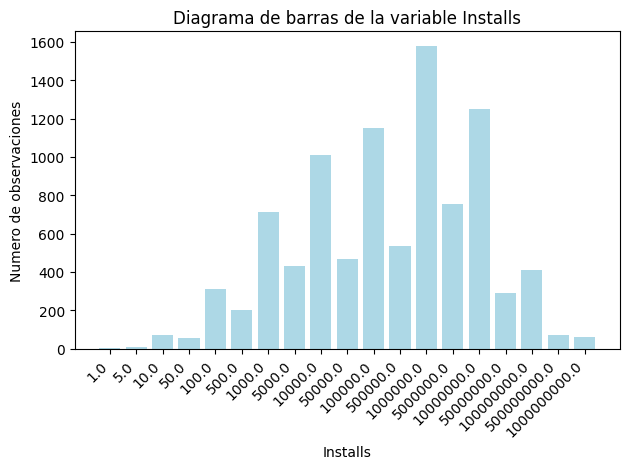

In [37]:
plt.bar(frecuencia_absoluta.index.astype(str), frecuencia_absoluta.values, color='lightblue')
plt.title("Diagrama de barras de la variable Installs")
plt.xlabel("Installs")
plt.ylabel("Numero de observaciones")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.savefig('diagrama de barras.png')
plt.show()


### La mayor observación en instalaciones corresponde a las aplicaciones que fueron descargadas 1 000 000 de veces. A partir de las frecuencias, podemos ver cómo hay números muy grandes que parecen ser outliers.

In [38]:
print("=" * 80)
print("ANÁLISIS ESTADÍSTICO POR RANGO DE INSTALACIONES")
print("=" * 80)

category_stats = play_store_clean.groupby('Installs_Category')['Installs'].agg([
    ('N', 'count'),
    ('Media', 'mean'),
    ('Mediana', 'median'),
    ('Desviación', 'std'),
    ('Mínimo', 'min'),
    ('Máximo', 'max'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75)),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    ('Coef_Variación', lambda x: (x.std() / x.mean()) * 100 if x.mean() > 0 else 0)
]).round(2)

print(category_stats)
category_stats.to_csv('categoria.csv')

ANÁLISIS ESTADÍSTICO POR RANGO DE INSTALACIONES
                      N         Media      Mediana    Desviación       Mínimo  \
Installs_Category                                                               
0-100               137  2.582000e+01         10.0  2.025000e+01          1.0   
101-1K              510  2.576500e+02        100.0  1.956600e+02        100.0   
1K-10K             1144  2.506990e+03       1000.0  1.939130e+03       1000.0   
10K-100K           1476  2.262873e+04      10000.0  1.859835e+04      10000.0   
100K-1M            1687  2.273266e+05     100000.0  1.863845e+05     100000.0   
1M-10M             2328  2.292096e+06    1000000.0  1.870929e+06    1000000.0   
10M-100M           1541  1.750162e+07   10000000.0  1.561886e+07   10000000.0   
100M+               539  2.502783e+08  100000000.0  2.934459e+08  100000000.0   

                         Máximo           Q1           Q3        IQR  \
Installs_Category                                                    

C:\Users\Laptop\AppData\Local\Temp\ipykernel_28400\3934479498.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = play_store_clean.groupby('Installs_Category')['Installs'].agg([


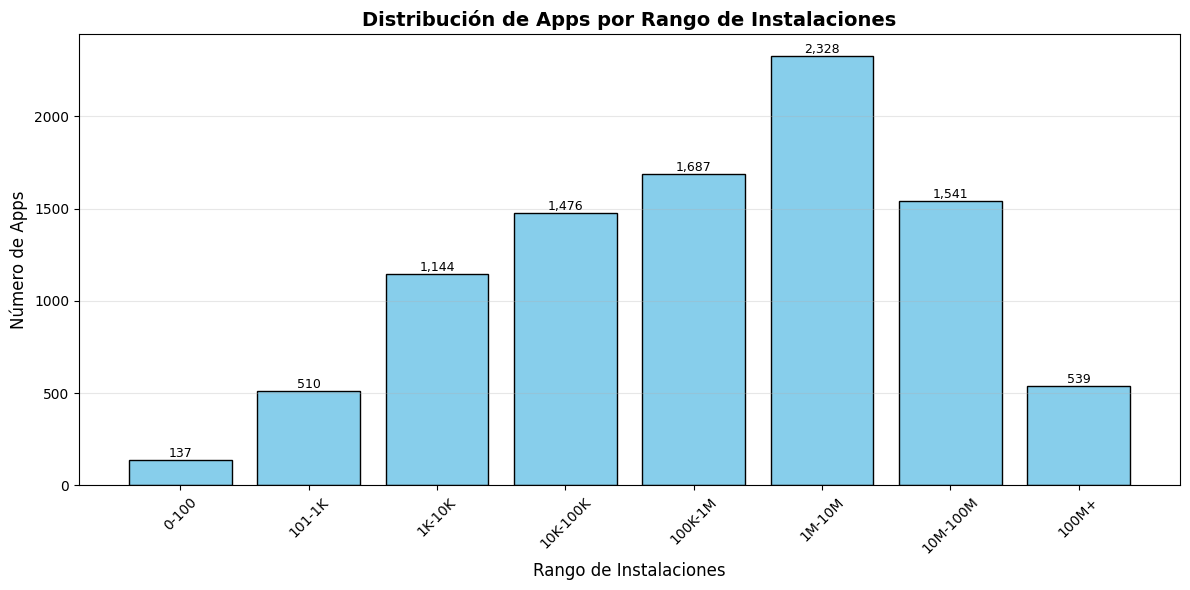

Distribución porcentual por rango de instalaciones:
  0-100: 137 apps (1.5%)
  101-1K: 510 apps (5.4%)
  1K-10K: 1,144 apps (12.2%)
  10K-100K: 1,476 apps (15.8%)
  100K-1M: 1,687 apps (18.0%)
  1M-10M: 2,328 apps (24.9%)
  10M-100M: 1,541 apps (16.5%)
  100M+: 539 apps (5.8%)


In [39]:
# Crear categorías de instalaciones
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, float('inf')]
labels = ['0-100', '101-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-100M', '100M+']

play_store_clean['Installs_Category'] = pd.cut(play_store_clean['Installs'], bins=bins, labels=labels, right=False)

# Gráfico de barras de distribución por categoría
plt.figure(figsize=(12, 6))
installs_dist = play_store_clean['Installs_Category'].value_counts().sort_index()
bars = plt.bar(installs_dist.index, installs_dist.values, color='skyblue', edgecolor='black')

plt.title('Distribución de Apps por Rango de Instalaciones', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Instalaciones', fontsize=12)
plt.ylabel('Número de Apps', fontsize=12)
plt.xticks(rotation=45)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribucio.png')
plt.show()

# Porcentajes
print("Distribución porcentual por rango de instalaciones:")
for category, count in installs_dist.items():
    percentage = (count / len(play_store_clean)) * 100
    print(f"  {category}: {count:,} apps ({percentage:.1f}%)")

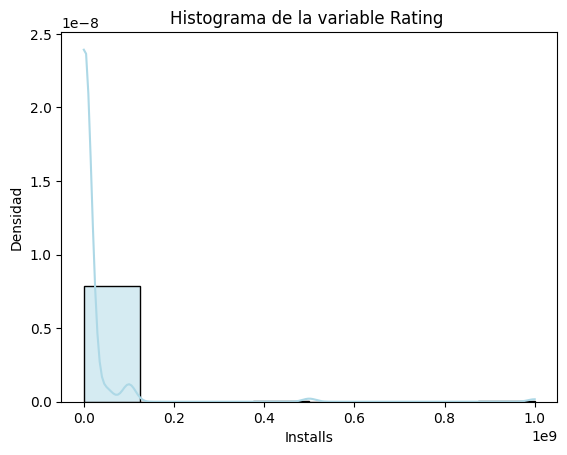

In [40]:
sns.histplot(play_store_clean['Installs'],kde=True,color='lightblue',bins=8,stat='density',linewidth=1,)
plt.title("Histograma de la variable Rating ")
plt.xlabel("Installs")
plt.ylabel("Densidad")
plt.savefig('installhisplot.png')
plt.show()

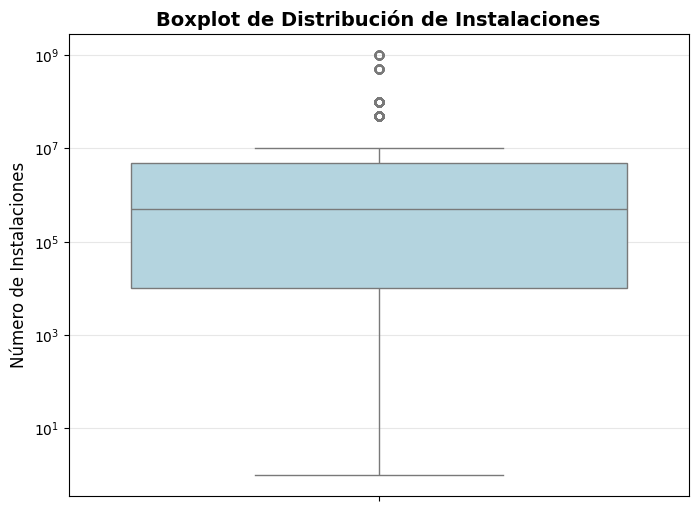

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=play_store_clean['Installs'].dropna(), color='lightblue')
plt.title('Boxplot de Distribución de Instalaciones', fontsize=14, fontweight='bold')
plt.ylabel('Número de Instalaciones', fontsize=12)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(axis='y', alpha=0.3)
# Agregar estadísticas
median = play_store_clean['Installs'].median()
q1 = play_store_clean['Installs'].quantile(0.25)
q3 = play_store_clean['Installs'].quantile(0.75)

# New

In [ ]:
sk = skew(play_store_clean['Installs'])
if sk == 0 :
    print(f"La distribución es simétrica alrededor de la media.")
elif sk > 0:
    print(F'La distribución tiene asimetría positiva = {sk}')
else:
    print(f"La distribución tiene asimetría negativa = {sk}")
        

La distribución tiene asimetría positiva = 8.884970819661488


In [43]:
# Calcular Z-scores por rango
play_store_clean['Z_Score_Global'] = stats.zscore(play_store_clean['Installs'], nan_policy='omit')

# Calcular Z-scores dentro de cada rango
def calculate_zscore_by_category(group):
    return stats.zscore(group, nan_policy='omit')

play_store_clean['Z_Score_Within_Category'] = play_store_clean.groupby('Installs_Category')['Installs'].transform(calculate_zscore_by_category)

# Análisis de Z-scores
print("\n" + "=" * 80)
print("ANÁLISIS DE Z-SCORES POR RANGO")
print("=" * 80)

# Estadísticas de Z-scores por rango
zscore_stats = play_store_clean.groupby('Installs_Category')[['Z_Score_Global', 'Z_Score_Within_Category']].agg([
    'mean', 'std', 'min', 'max', 
    lambda x: (abs(x) > 3).sum()  # Contar valores > 3 std
]).round(3)

zscore_stats.columns = ['_'.join(col).strip() for col in zscore_stats.columns.values]
zscore_stats.to_csv('zscore.csv')
print(zscore_stats)

# Identificar outliers extremos por Z-score
print("\n" + "=" * 80)
print("OUTLIERS EXTREMOS POR Z-SCORE (|Z| > 3)")
print("=" * 80)

for threshold in [3, 4, 5]:
    outliers_global = play_store_clean[abs(play_store_clean['Z_Score_Global']) > threshold]
    outliers_within = play_store_clean[abs(play_store_clean['Z_Score_Within_Category']) > threshold]
    
    print(f"\nUmbral Z-score: |Z| > {threshold}")
    print(f"  - Outliers globales: {len(outliers_global):,} apps ({len(outliers_global)/len(play_store_clean)*100:.2f}%)")
    print(f"  - Outliers dentro de rango: {len(outliers_within):,} apps ({len(outliers_within)/len(play_store_clean)*100:.2f}%)")
    
    if len(outliers_global) > 0:
        print(f"  - Ejemplo de outlier global (Z={outliers_global['Z_Score_Global'].iloc[0]:.1f}):")
        outlier_example = outliers_global.iloc[0]
        print(f"    App: {outlier_example['App']}")
        print(f"    Installs: {outlier_example['Installs']:,}")
        print(f"    Category: {outlier_example['Category']}")


ANÁLISIS DE Z-SCORES POR RANGO
                   Z_Score_Global_mean  Z_Score_Global_std  \
Installs_Category                                            
0-100                           -0.196               0.000   
101-1K                          -0.196               0.000   
1K-10K                          -0.196               0.000   
10K-100K                        -0.196               0.000   
100K-1M                         -0.194               0.002   
1M-10M                          -0.171               0.021   
10M-100M                        -0.004               0.171   
100M+                            2.546               3.216   

                   Z_Score_Global_min  Z_Score_Global_max  \
Installs_Category                                           
0-100                          -0.196              -0.196   
101-1K                         -0.196              -0.196   
1K-10K                         -0.196              -0.196   
10K-100K                       -0.196     

C:\Users\Laptop\AppData\Local\Temp\ipykernel_28400\3222960117.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  play_store_clean['Z_Score_Within_Category'] = play_store_clean.groupby('Installs_Category')['Installs'].transform(calculate_zscore_by_category)
C:\Users\Laptop\AppData\Local\Temp\ipykernel_28400\3222960117.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zscore_stats = play_store_clean.groupby('Installs_Category')[['Z_Score_Global', 'Z_Score_Within_Category']].agg([


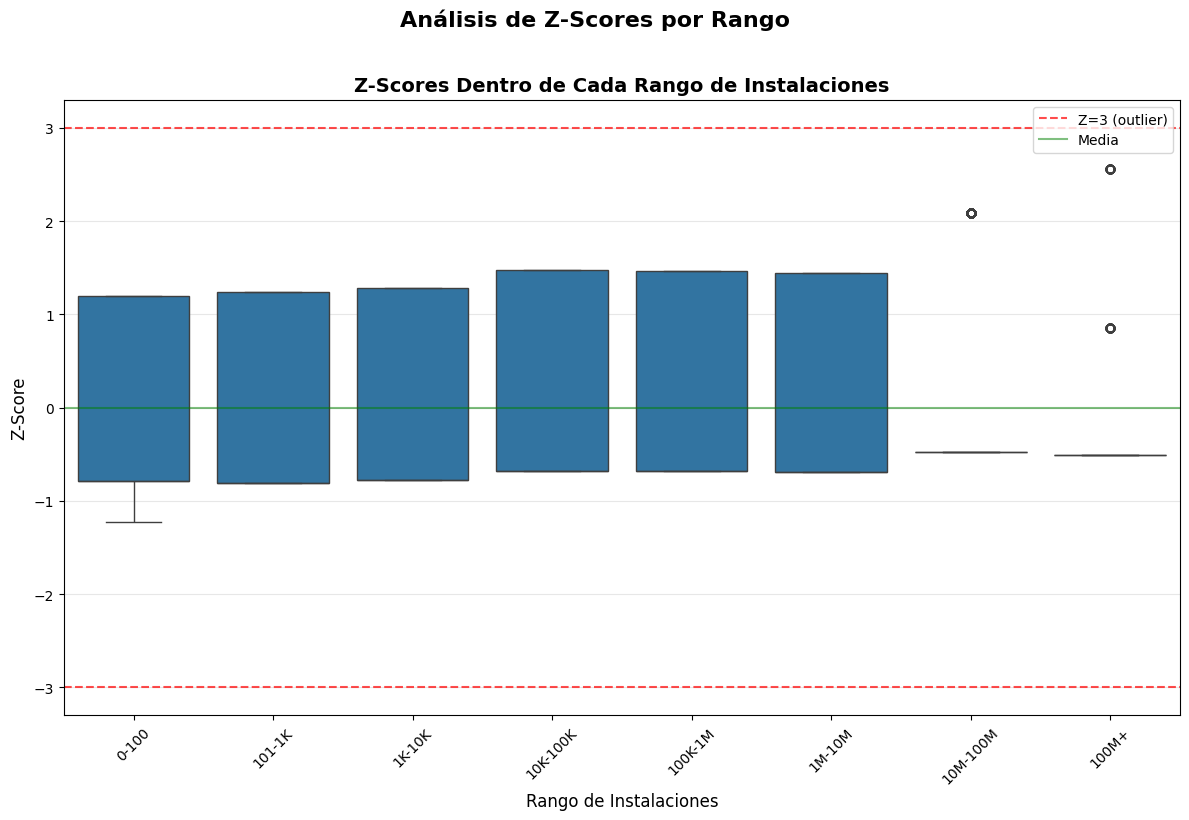

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.boxplot(data=play_store_clean, x='Installs_Category', y='Z_Score_Within_Category', ax=ax)
ax.axhline(y=3, color='red', linestyle='--', alpha=0.7, label='Z=3 (outlier)')
ax.axhline(y=-3, color='red', linestyle='--', alpha=0.7)
ax.axhline(y=0, color='green', linestyle='-', alpha=0.5, label='Media')
ax.set_title('Z-Scores Dentro de Cada Rango de Instalaciones', fontsize=14, fontweight='bold')
ax.set_xlabel('Rango de Instalaciones', fontsize=12)
ax.set_ylabel('Z-Score', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.suptitle('Análisis de Z-Scores por Rango', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

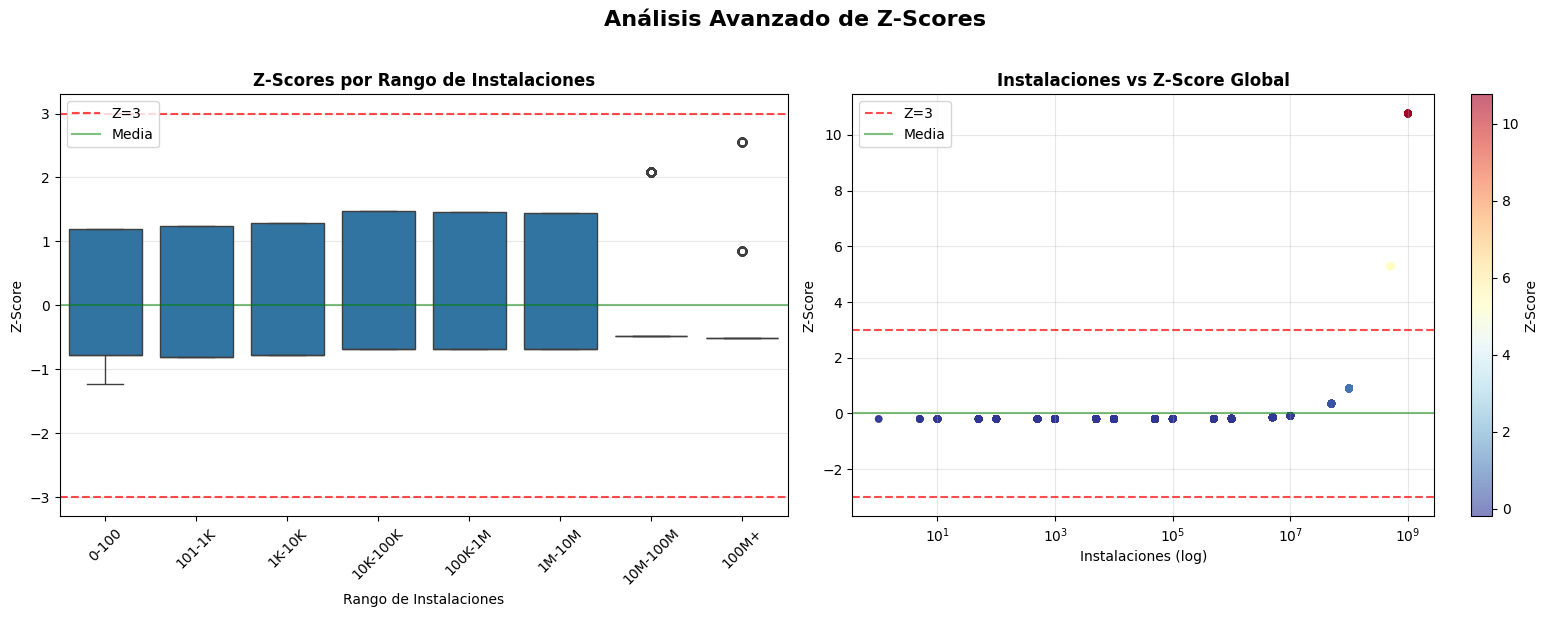

In [45]:
# 2 gráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot
sns.boxplot(data=play_store_clean, x='Installs_Category', y='Z_Score_Within_Category', ax=axes[0])
axes[0].axhline(y=3, color='red', linestyle='--', alpha=0.7, label='Z=3')
axes[0].axhline(y=-3, color='red', linestyle='--', alpha=0.7)
axes[0].axhline(y=0, color='green', linestyle='-', alpha=0.5, label='Media')
axes[0].set_title('Z-Scores por Rango de Instalaciones', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Rango de Instalaciones', fontsize=10)
axes[0].set_ylabel('Z-Score', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Scatter plot
scatter = axes[1].scatter(play_store_clean['Installs'], play_store_clean['Z_Score_Global'], 
                          c=play_store_clean['Z_Score_Global'], cmap='RdYlBu_r', 
                          alpha=0.6, s=20)
axes[1].set_xscale('log')
axes[1].set_title('Instalaciones vs Z-Score Global', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Instalaciones (log)', fontsize=10)
axes[1].set_ylabel('Z-Score', fontsize=10)
axes[1].axhline(y=3, color='red', linestyle='--', alpha=0.7, label='Z=3')
axes[1].axhline(y=-3, color='red', linestyle='--', alpha=0.7)
axes[1].axhline(y=0, color='green', linestyle='-', alpha=0.5, label='Media')
plt.colorbar(scatter, ax=axes[1], label='Z-Score')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Análisis Avanzado de Z-Scores', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('zscore.png')
plt.show()

In [46]:
# Identificar y analizar outliers en detalle
print("\n" + "=" * 80)
print("ANÁLISIS DETALLADO DE LOS TOP OUTLIERS")
print("=" * 80)

# Definir diferentes métodos de detección de outliers
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (data < lower) | (data > upper)

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data, nan_policy='omit'))
    return z_scores > threshold

def detect_outliers_mad(data, threshold=3):
    """MAD: Median Absolute Deviation - más robusto que std para outliers"""
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    if mad == 0:
        return pd.Series([False] * len(data))
    modified_z_scores = 0.6745 * (data - median) / mad
    return np.abs(modified_z_scores) > threshold

# Aplicar métodos por rango
outliers_analysis = []
for category in labels:
    if category in play_store_clean['Installs_Category'].cat.categories:
        cat_data = play_store_clean[play_store_clean['Installs_Category'] == category]
        installs = cat_data['Installs']
        
        outliers_iqr = detect_outliers_iqr(installs).sum()
        outliers_z = detect_outliers_zscore(installs, threshold=3).sum()
        outliers_mad = detect_outliers_mad(installs, threshold=3.5).sum()
        
        outliers_analysis.append({
            'Rango': category,
            'Total_Apps': len(cat_data),
            'Outliers_IQR': outliers_iqr,
            '%_IQR': (outliers_iqr/len(cat_data))*100,
            'Outliers_Z3': outliers_z,
            '%_Z3': (outliers_z/len(cat_data))*100,
            'Outliers_MAD': outliers_mad,
            '%_MAD': (outliers_mad/len(cat_data))*100
        })

# Crear DataFrame de análisis
outliers_df = pd.DataFrame(outliers_analysis)
print(outliers_df.round(2))


ANÁLISIS DETALLADO DE LOS TOP OUTLIERS
      Rango  Total_Apps  Outliers_IQR  %_IQR  Outliers_Z3  %_Z3  Outliers_MAD  \
0     0-100         137             0   0.00            0   0.0             0   
1    101-1K         510             0   0.00            0   0.0             0   
2    1K-10K        1144             0   0.00            0   0.0             0   
3  10K-100K        1476             0   0.00            0   0.0             0   
4   100K-1M        1687             0   0.00            0   0.0             0   
5    1M-10M        2328             0   0.00            0   0.0             0   
6  10M-100M        1541           289  18.75            0   0.0             0   
7     100M+         539           130  24.12            0   0.0             0   

   %_MAD  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
5    0.0  
6    0.0  
7    0.0  


## Variable Reviews

In [47]:
#Frecuencia absoluta de la variable Reviews
frecuencia_absoluta2 = play_store_clean['Reviews'].value_counts().sort_index()
#Frecuencia absoluta acumulada de la variable Reviews
frecuencia_absoluta_acum2 = frecuencia_absoluta2.cumsum()
#Frecuencia relativa en porcentaje de la variable Reviews
frecuencia_relativa2 = play_store_clean['Reviews'].value_counts(normalize=True).sort_index() * 100
#normalize=True devuelve la proporción de cada valor en relación al total, en lugar de las frecuencias absolutas.
#Frecuencia relativa acumulada de la variable Reviews
frecuencia_relativa_acum2 =frecuencia_relativa2.cumsum()

In [48]:
tabla_frecuencias2 = pd.DataFrame({ 'Frecuencia Absoluta ':
frecuencia_absoluta2,
'Frecuencia Absoluta Acumulada ':
frecuencia_absoluta_acum2,
'Frecuencia Relativa (%) ':
frecuencia_relativa2,
'Frecuencia Relativa Acumulada':
frecuencia_relativa_acum2})
print(tabla_frecuencias2)
tabla_frecuencias2.to_csv("tabla_rev.csv")

          Frecuencia Absoluta   Frecuencia Absoluta Acumulada   \
Reviews                                                          
1                           67                              67   
2                           83                             150   
3                           78                             228   
4                           74                             302   
5                           74                             376   
...                        ...                             ...   
66577446                     1                            9357   
69109672                     1                            9358   
69119316                     2                            9360   
78128208                     1                            9361   
78158306                     1                            9362   

          Frecuencia Relativa (%)   Frecuencia Relativa Acumulada  
Reviews                                                            
1    

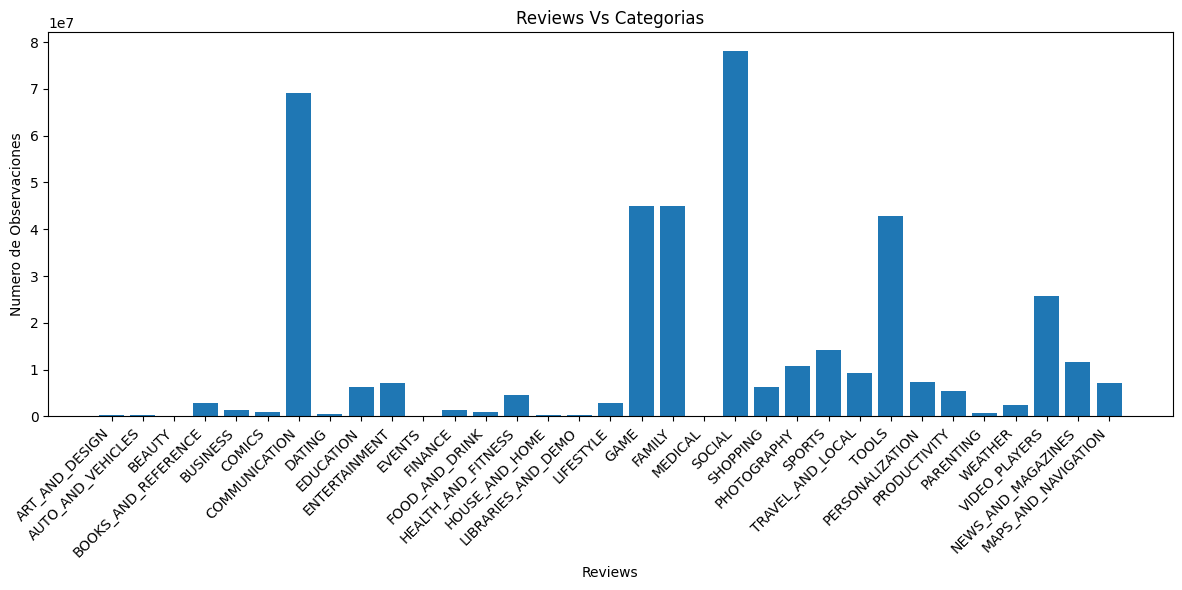

In [51]:
plt.figure(figsize=(12,6))
plt.bar(play_store_clean['Category'], play_store_clean["Reviews"])
plt.title("Reviews Vs Categorias")
plt.xlabel("Reviews")
plt.ylabel("Numero de Observaciones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("review.png")
plt.show()

### Se tomaron los 20 valores más frecuentes de Reviews porque el total es muy grande. A partir de las frecuencias, podemos ver cómo hay números que parecen ser outliers.

## EDA univariante de variables continuas.

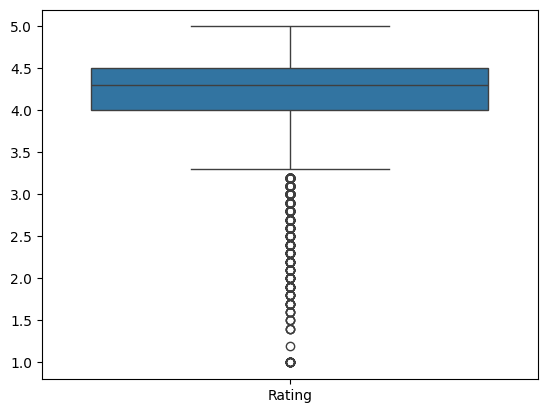

In [ ]:
sns.boxplot(data=play_store_clean[["Rating"]])
plt.show()

In [ ]:
col_name = 'Rating'  

# Calcular el z-score
play_store_clean['z_score'] = (play_store_clean[col_name] - play_store_clean[col_name].mean()) / play_store_clean[col_name].std()

# Mostrar primeras filas con el z-score
print(play_store_clean[['Rating', 'z_score']].head())

play_store_clean[['Rating', 'z_score']].to_csv("z_score_rating.csv")



   Rating   z_score
0     4.1 -0.178356
1     3.9 -0.566538
2     4.7  0.986190
3     4.5  0.598008
4     4.3  0.209826


In [ ]:
def tdfA(y):
    # Calculamos el número de clases usando la regla de Sturges
    k = int(np.ceil(1 + 3.322 * np.log10(len(y))))

    # Creamos los intervalos de clase usando pd.cut
    intervalos = pd.cut(y, bins=k)
    # Tabla de frecuencias absolutas
    tabla2 = pd.DataFrame(intervalos.value_counts().sort_index()).reset_index()
    tabla2.columns = ['Intervalos', 'Freq']
    # Frecuencia acumulada
    tabla2['F.Acum'] = tabla2['Freq'].cumsum()
    # Frecuencia relativa
    tabla2['F.R'] = tabla2['Freq'] / tabla2['Freq'].sum()
    # Frecuencia relativa acumulada
    tabla2['F.R.Acum'] = tabla2['F.R'].cumsum()
    # Porcentajes
    tabla2['FR.Porc'] = 100 * tabla2['F.R']
    tabla2['FRA.Porc'] = 100 * tabla2['F.R.Acum']
    # Función para calcular las marcas de clase
    def midpoints(intervalos):
        return intervalos.apply(lambda x: (x.left + x.right) / 2)
    # Agregamos la columna de marcas de clase
    tabla2['MC'] = midpoints(tabla2['Intervalos'])
    return tabla2

In [ ]:
frec = tdfA(play_store_clean['Rating'])
frec.to_csv("frec.csv")
print(frec)

        Intervalos  Freq  F.Acum       F.R  F.R.Acum    FR.Porc    FRA.Porc  \
0   (0.996, 1.267]    17      17  0.001816  0.001816   0.181585    0.181585   
1   (1.267, 1.533]     6      23  0.000641  0.002457   0.064089    0.245674   
2     (1.533, 1.8]    20      43  0.002136  0.004593   0.213630    0.459304   
3     (1.8, 2.067]    25      68  0.002670  0.007263   0.267037    0.726341   
4   (2.067, 2.333]    42     110  0.004486  0.011750   0.448622    1.174963   
5     (2.333, 2.6]    65     175  0.006943  0.018693   0.694296    1.869259   
6     (2.6, 2.867]    67     242  0.007157  0.025849   0.715659    2.584918   
7   (2.867, 3.133]   197     439  0.021043  0.046892   2.104251    4.689169   
8     (3.133, 3.4]   293     732  0.031297  0.078188   3.129673    7.818842   
9     (3.4, 3.667]   337    1069  0.035997  0.114185   3.599658   11.418500   
10  (3.667, 3.933]   928    1997  0.099124  0.213309   9.912412   21.330912   
11    (3.933, 4.2]  2225    4222  0.237663  0.450972

In [ ]:
play_store_clean['Rating'].mean() 

 

np.float64(4.191892757957701)

In [ ]:
play_store_clean['Rating'].median()


np.float64(4.3)

In [ ]:
play_store_clean['Rating'].mode()

0    4.4
Name: Rating, dtype: float64

In [ ]:
play_store_clean['Rating'].quantile([0.25, 0.5, 0.75])

0.25    4.0
0.50    4.3
0.75    4.5
Name: Rating, dtype: float64

In [ ]:
play_store_clean['Rating'].quantile([i / 10 for i in range(1, 10)])
play_store_clean['Rating'].quantile([i / 100 for i in range(1, 100)])

0.01    2.3
0.02    2.7
0.03    2.9
0.04    3.1
0.05    3.2
       ... 
0.95    4.8
0.96    4.8
0.97    4.9
0.98    5.0
0.99    5.0
Name: Rating, Length: 99, dtype: float64

In [ ]:
play_store_clean['Rating'].var() #varianza
play_store_clean['Rating'].std() #desviación estándar
max=play_store_clean['Rating'].max() #máximo
min=play_store_clean['Rating'].min() #mínimo
rango=max-min
print(rango)
Q3=play_store_clean['Rating'].quantile(0.75) #Cuantil Q3
Q1=play_store_clean['Rating'].quantile(0.25) #Cuantil Q1
IQR=Q3-Q1
print(IQR)
play_store_clean['Rating'].describe() #Resumen, muestra todo lo anterior

4.0
0.5


count    9362.000000
mean        4.191893
std         0.515222
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
skew(play_store_clean['Rating'])

np.float64(-1.850172560764023)

In [ ]:

kurtosis(play_store_clean['Rating'], fisher=False)

np.float64(8.78719100765059)

In [ ]:
kurtosis(play_store_clean['Installs'], fisher=False)

np.float64(89.140691872694)

Text(0, 0.5, 'Frecuencia')

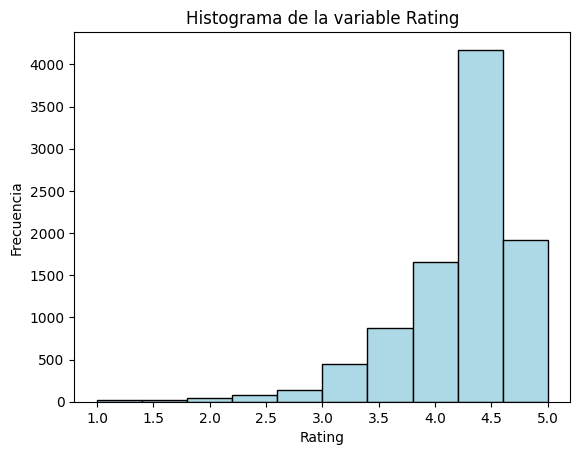

In [ ]:
plt.hist(play_store_clean['Rating'], color='lightblue',
edgecolor='black')
plt.title("Histograma de la variable Rating")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")

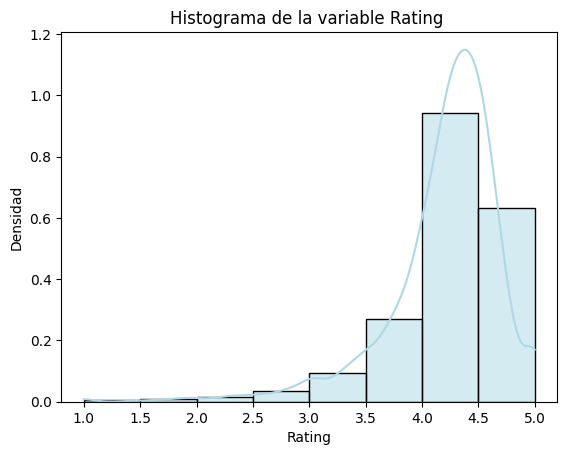

In [ ]:
sns.histplot(play_store_clean['Rating'],kde=True,color='lightblue',bins=8,stat='density',linewidth=1,)
plt.title("Histograma de la variable Rating ")
plt.xlabel("Rating")
plt.ylabel("Densidad")
plt.savefig('revhisplot.png')
plt.show()

## La distribución del Rating es aproximadamente simétrica, presentando un ligero sesgo a la izquierda que se pueden tomar como outliers de valores con muy mala calificacion,la mayor concentración de valores  estan entre 4 y 5.


# CATEGORICA - CATEGORICA EDA
##### Observando los datos y el gráfico, se aprecia una asociación entre el tipo de app y el rating. Las apps de pago tienden a recibir mejores valoraciones que las gratuitas, mientras que las gratuitas muestran más variabilidad en sus ratings.

Type,Free,Paid
Rating,,
1.0,14,2
1.2,1,0
1.4,3,0
1.5,3,0
1.6,4,0
1.7,7,1
1.8,7,1
1.9,13,0
2.0,11,1


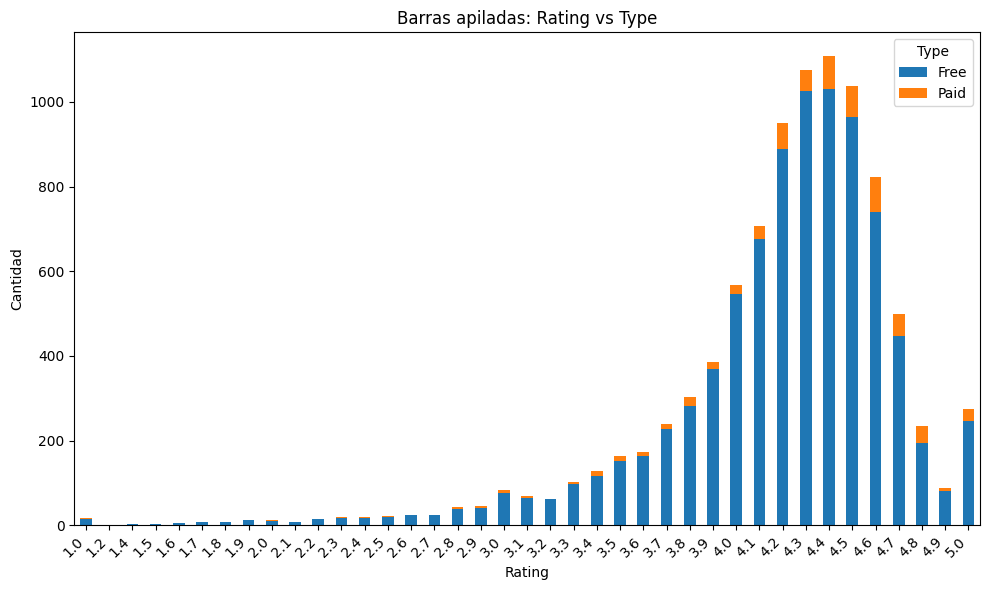

Chi2ContingencyResult(statistic=np.float64(103.27604499285361), pvalue=np.float64(6.037044965670568e-08), dof=38, expected_freq=array([[1.48959624e+01, 1.10403760e+00],
       [9.30997650e-01, 6.90023499e-02],
       [2.79299295e+00, 2.07007050e-01],
       [2.79299295e+00, 2.07007050e-01],
       [3.72399060e+00, 2.76009400e-01],
       [7.44798120e+00, 5.52018799e-01],
       [7.44798120e+00, 5.52018799e-01],
       [1.21029695e+01, 8.97030549e-01],
       [1.11719718e+01, 8.28028199e-01],
       [7.44798120e+00, 5.52018799e-01],
       [1.30339671e+01, 9.66032899e-01],
       [1.86199530e+01, 1.38004700e+00],
       [1.76889554e+01, 1.31104465e+00],
       [1.95509507e+01, 1.44904935e+00],
       [2.32749413e+01, 1.72505875e+00],
       [2.32749413e+01, 1.72505875e+00],
       [3.91019013e+01, 2.89809870e+00],
       [4.18948943e+01, 3.10510575e+00],
       [7.72728050e+01, 5.72719504e+00],
       [6.42388379e+01, 4.76116214e+00],
       [5.86528520e+01, 4.34714805e+00],
       [9.4

In [ ]:
#CONTENT RATING VS TYPE
#Tabla de contingencia
tabla_contingencia=pd.crosstab(play_store_clean['Rating'], play_store_clean['Type'])
display(tabla_contingencia)

tabla_contingencia.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Barras apiladas: Rating vs Type")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Chi2
from scipy.stats import chi2_contingency
chi2_contingency(tabla_contingencia)

# CATEGORICA - NUMERICA EDA
##### Observando el boxplot, se aprecia que la categoría de la app influye en el rating. Algunas categorías tienden a recibir mejores valoraciones en promedio, mientras que otras muestran más dispersión y outliers. Esto sugiere una relación visual entre la categoría y la valoración de la app.

ANÁLISIS: Rating vs Category (Only 3)
Muestra: 8
Resultados de Anova: F_onewayResult(statistic=np.float64(4.0955569972163035), pvalue=np.float64(0.016762616214457494))


C:\Users\Laptop\AppData\Local\Temp\ipykernel_71292\800287660.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


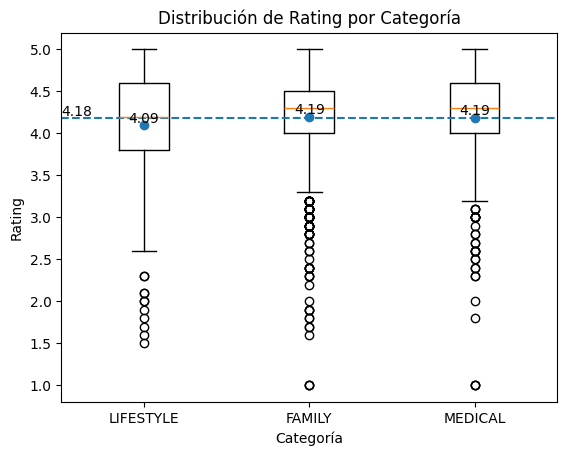

In [ ]:
#Rating vs category 
# Comparando la media de rating por categoria

category_LFS = play_store_clean[play_store_clean['Category'] == 'LIFESTYLE']['Rating'].dropna()
catgeory_MED = play_store_clean[play_store_clean['Category'] == 'MEDICAL']['Rating'].dropna()
category_FAM = play_store_clean[play_store_clean['Category'] == 'FAMILY']['Rating'].dropna()

# ANOVA 
print("="*60)
print("ANÁLISIS: Rating vs Category (Only 3)")
print(f"Muestra: {len("Category"):,}")
print(f"Resultados de Anova: {stats.f_oneway(category_LFS, category_FAM, catgeory_MED)}")
print("="*60)

#GRAFICO BOWPLOT
# Datos
data = [category_LFS, category_FAM, catgeory_MED]
labels = ['LIFESTYLE', 'FAMILY', 'MEDICAL']

# Medias por categoría
means = [np.mean(d) for d in data]

# Media general (todas las categorías juntas)
all_ratings = np.concatenate(data)
global_mean = np.mean(all_ratings)
plt.figure()

# Bowplot
plt.boxplot(data, labels=labels)

# Medias por categoría (puntos)
plt.scatter(range(1, len(means) + 1), means)
for i, mean in enumerate(means, start=1):
    plt.text(i, mean, f"{mean:.2f}", ha='center', va='bottom')

# Línea de la media general
plt.axhline(global_mean, linestyle='--')
plt.text(0.5, global_mean, f"{global_mean:.2f}",
         va='bottom')

plt.title('Distribución de Rating por Categoría')
plt.ylabel('Rating')
plt.xlabel('Categoría')
plt.show()



In [ ]:
from scipy import stats

print("="*60)
h_stat, p_value = stats.kruskal(category_LFS,category_FAM,catgeory_MED)
print("ANÁLISIS: Rating vs Category (Kruskal-Wallis)")
print(f"H = {h_stat:.4f}, p-value = {p_value:.4e}")
print("="*60)

ANÁLISIS: Rating vs Category (Kruskal-Wallis)
H = 6.3427, p-value = 4.1947e-02


# NUMERICA - NUMERICA EDA

In [ ]:
play_store_clean.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Size_num', 'Installs_Category', 'Z_Score_Global',
       'Z_Score_Within_Category', 'z_score'],
      dtype='object')

In [ ]:
#Rating vs installs 
import pandas as pd 
correlacion_values = play_store_clean.drop(columns=['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 
        'Last Updated', 'Current Ver', 'Installs_Category', 'Size_num','Z_Score_Global', 'Z_Score_Within_Category', 'z_score'])
print(correlacion_values.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9362 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9362 non-null   float64
 1   Reviews   9362 non-null   Int64  
 2   Installs  9362 non-null   float64
 3   Price     9362 non-null   float64
dtypes: Int64(1), float64(3)
memory usage: 374.8 KB
None


In [ ]:
matriz_correlacion = correlacion_values.corr()

<Axes: >

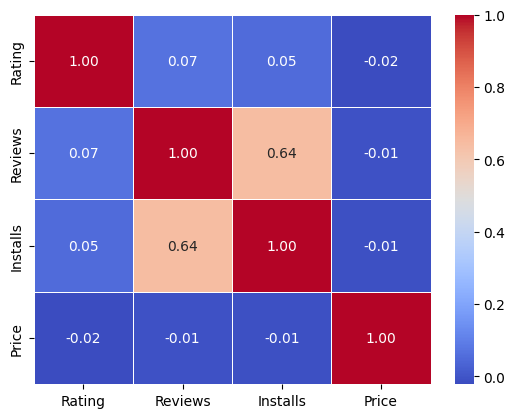

In [ ]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)

In [ ]:
stats.pearsonr(play_store_clean['Installs'],play_store_clean['Reviews'])

PearsonRResult(statistic=np.float64(0.641607641034827), pvalue=np.float64(0.0))

Text(0, 0.5, 'Installs')

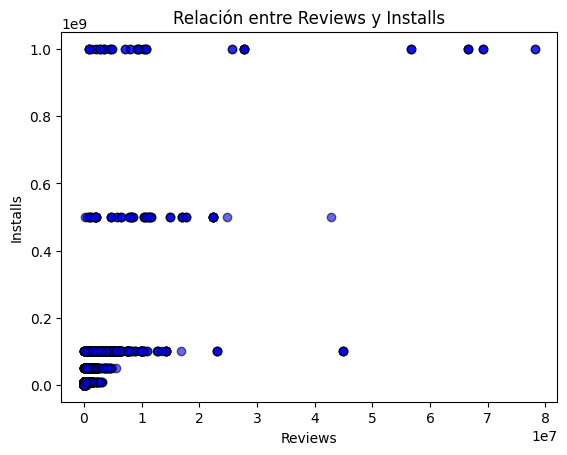

In [ ]:
plt.scatter(play_store_clean['Reviews'], play_store_clean['Installs'], color='blue',edgecolors='black', alpha=0.6) 
plt.title("Relación entre Reviews y Installs") 
plt.xlabel("Reviews") 
plt.ylabel("Installs")

# Hipotesis 1

In [ ]:
df_clean = play_store_clean.dropna(subset=['Installs', 'Reviews'])
#Prueba de hipótesis simplificada
print("H₀: ρ = 0 (No hay correlación entre Installs y Reviews)")
print("H₁: ρ ≠ 0 (Existe correlación entre Installs y Reviews)")
print("α = 0.05")

#Calcular correlación y prueba
corr, p_value = stats.spearmanr(df_clean['Installs'], df_clean['Reviews'])
n = len(df_clean)

print(f"\nResultados:")
print(f"• Tamaño de muestra: n = {n:,}")
print(f"• Correlación de Spearman: ρ = {corr:.4f}")
print(f"• Valor p: {p_value:.10f} ({p_value:.2e})")

#Decisión
print(f"\nDecisión (α = 0.05):")
if p_value < 0.05:
    print(f"RECHAZAR H₀ (p < 0.05)")
    print(f"Conclusión: Existe evidencia estadística de correlación significativa")
else:
    print(f" NO RECHAZAR H₀ (p > 0.05)")
    print(f"Conclusión: No hay evidencia suficiente de correlación")

#Tamaño del efecto
print(f"\nTamaño del efecto:")
if abs(corr) < 0.3:
    print(f"  ρ = {corr:.3f} → Correlación débil")
elif abs(corr) < 0.7:
    print(f"  ρ = {corr:.3f} → Correlación moderada")
else:
    print(f"  ρ = {corr:.3f} → Correlación fuerte")

H₀: ρ = 0 (No hay correlación entre Installs y Reviews)
H₁: ρ ≠ 0 (Existe correlación entre Installs y Reviews)
α = 0.05

Resultados:
• Tamaño de muestra: n = 9,362
• Correlación de Spearman: ρ = 0.9641
• Valor p: 0.0000000000 (0.00e+00)

Decisión (α = 0.05):
RECHAZAR H₀ (p < 0.05)
Conclusión: Existe evidencia estadística de correlación significativa

Tamaño del efecto:
  ρ = 0.964 → Correlación fuerte


# Hipotesis 2 
#### Tanto el ANOVA como el Kruskal-Wallis muestran que la categoría de la app influye en el rating. Algunas categorías (por ejemplo MEDICAL) tienden a recibir valoraciones más altas, mientras que otras presentan más dispersión. Los resultados son consistentes incluso considerando outliers o posibles desviaciones de la normalidad.

In [ ]:
# ANOVA
print("="*60)
print("ANÁLISIS: Rating vs Category (Only 3)")

# Tamaño total de la muestra usada
total_muestra = len(category_LFS) + len(category_FAM) + len(catgeory_MED)
print(f"Muestra: {total_muestra:,}")

# ANOVA
f_stat, p_val = stats.f_oneway(category_LFS, category_FAM, catgeory_MED)
print(f"F = {f_stat:.4f}, p-value = {p_val:.4e}")
print("="*60)

# Kruskal-Wallis
h_stat, p_value = stats.kruskal(category_LFS, category_FAM, catgeory_MED)
print("ANÁLISIS: Rating vs Category (Kruskal-Wallis)")
print(f"H = {h_stat:.4f}, p-value = {p_value:.4e}")
print("="*60)


ANÁLISIS: Rating vs Category (Only 3)
Muestra: 2,410
F = 4.0956, p-value = 1.6763e-02
ANÁLISIS: Rating vs Category (Kruskal-Wallis)
H = 6.3427, p-value = 4.1947e-02
